Clayton Cohn<br>
April 21, 2020<br>
DSC 478<br>
Prof. Mobasher

# Assignment 2

1. K-Nearest-Neighbor (KNN) classification on Newsgroups [Dataset: newsgroups.zip]

In [1]:
import pandas as pd

DATA_PATH = "/Users/claytoncohn/Dropbox/New/DePaul/DSC478/data/newsgroups/"

For this problem you will use a subset of the 20 Newsgroup data set.<br>
- The full data set contains 20,000 newsgroup documents
- Partitioned (nearly) evenly across 20 different newsgroups  
- The assignment data set contains a subset of 1000 documents and a vocabulary of  5,500 terms 
- Each document belongs to one of two classes Hockey (class label 1) and Microsoft Windows (class label 0)
- The data has already been split (80%, 20%) into training and test data
- The class labels for the training and test data are also provided in separate files
- The training and test data are on term x document format: row for each term, column for each document. 
- The values in the table represent raw term occurence counts. 
- The data has already been preprocessed to extract tokens, remove stop words and perform stemming (so, the terms in the vocabulary are stems not full terms). 
- Please be sure to read the readme.txt file in the distribution.

In [2]:
#Preset training data
train_data = pd.read_table(DATA_PATH + "trainMatrixModified.txt", header=None)
train_labels = pd.read_table(DATA_PATH + "trainClasses.txt", header=None, index_col=0)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
#Preset testing data
test_data = pd.read_table(DATA_PATH + "testMatrixModified.txt", header=None)
test_labels = pd.read_table(DATA_PATH + "testClasses.txt", header=None, index_col=0)
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_data.shape

(5500, 800)

In [5]:
test_data.shape

(5500, 200)

In [6]:
#Convert training and testing data from TD to DT
dt_train = train_data.T
dt_test = test_data.T
dt_train.head()

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,2.0,2.0,2.0,1.0,8.0,6.0,2.0,8.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Your tasks in this problem are the following:<br><br>
[Note: for this problem you should not use scikit-learn for classification, but create your own KNN classifer. You may use Pandas, NumPy, standard Python libraries, and Matplotlib.]

Create your own KNN classifier function.<br><br>
Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the indices of the top K neighbors. <br><br>
Your classifier should work with Euclidean distance as well as Cosine distance (which is 1 minus the Cosine similarity). You may create two separate classifiers, or add the distance metric as a parameter in the classifier function.

In [7]:
import numpy as np

# kNN search method from the lecture slides
def knn_search(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dists

In [8]:
# kNN classify method from the lecture slides
def knn_classify(x, D, K, labels, measure):
    from collections import Counter
    neigh_idx, distances = knn_search(x, D, K, measure)
    neigh_labels = labels[neigh_idx]
    count = Counter(neigh_labels)
    return count.most_common(1)[0][0]

Create an evaluation function to measure the accuracy of your classifier. This function will call the classifier function in part a on all the test instances and in each case compares the actual test class label to the predicted class label. It should take as input the training data, the training labels, the test instances, the labels for test instances, and the value of K. Your evaluation function should return the Classification Accuracy (ratio of correct predictions to the number of test instances) [See class notes: Classification & Prediction - Review of Basic Concepts].

In [9]:
def knn_evaluate(test_data, test_labels, train_data, train_labels, K, measure):
    total = len(test_data)
    correct = 0
    for i in range(len(test_data)):
        label = knn_classify(test_data[i],train_data,K,train_labels,measure)
        if label == test_labels[i]: 
            correct += 1
    return correct/total

Run your evaluation function on a range of values for K from 5 to 100 (in increments of 5) in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. Present the results as graphs with K in the x-axis and the evaluation metric (accuracy) on the y-axis.

In [10]:
# Data prep
dtm_train = np.array(dt_train)
dtm_test = np.array(dt_test)
train_labels_arr = np.array(train_labels).flatten()
test_labels_arr = np.array(test_labels).flatten()

In [11]:
%%time

#Euclidean
Euclid = []
for K in range (1,101,5):
    Euclid.append(knn_evaluate(dtm_test,test_labels_arr,dtm_train,train_labels_arr,K,0))

CPU times: user 1min, sys: 10.8 s, total: 1min 11s
Wall time: 1min 11s


In [12]:
%%time

# Cosine 
Cosine = []
for K in range (1,101,5):
    Cosine.append(knn_evaluate(dtm_test,test_labels_arr,dtm_train,train_labels_arr,K,1))

CPU times: user 1min 28s, sys: 240 ms, total: 1min 29s
Wall time: 45.4 s


Use a single plot to compare the two version of the classifier (Eculidean distance version vs. cosine similarity version).

[0.985, 0.985, 0.98, 0.98, 0.975, 0.98, 0.97, 0.98, 0.975, 0.975, 0.97, 0.985, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975]


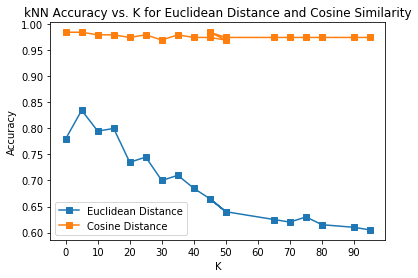

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [Euclid.index(i)*5 for i in Euclid]

plt.plot(x, Euclid, label='Euclidean Distance', marker="s") 
plt.plot(x, Cosine, label='Cosine Distance',marker="s") 

plt.xlabel('K')
plt.xticks(range(0,100,10))

plt.ylabel('Accuracy') 
plt.title('kNN Accuracy vs. K for Euclidean Distance and Cosine Similarity')
plt.legend(loc = 'best') 
plt.show()

Next, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on Text Categorization]. Then, rerun your evaluation (only for the Cosine similairty version of the classifier) on the range of K values (as above) and compare the results to the results without using TFxIDF weights.

In [22]:
nTerms = dtm_train.shape[1]
nTerms

5500

In [23]:
nDocs = dtm_train.shape[0]
nDocs

800

In [25]:
# Get the doc counts for each term
doc_terms = pd.DataFrame([(train_data!=0).sum(1)]).T

In [26]:
# Create a matrix with all of the entried (nDocs)
nMatrix = np.ones(np.shape(train_data), dtype=float) * nDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(nMatrix)

[[800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 ...
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]]


In [27]:
# Map array to IDF values (IDF = log of inverse of document freq)
# IDF only a function of term, so all rows will be identical.

IDF = np.log2(np.divide(nMatrix, np.array(doc_terms)))
IDF

array([[4.  , 4.  , 4.  , ..., 4.  , 4.  , 4.  ],
       [6.84, 6.84, 6.84, ..., 6.84, 6.84, 6.84],
       [6.32, 6.32, 6.32, ..., 6.32, 6.32, 6.32],
       ...,
       [8.64, 8.64, 8.64, ..., 8.64, 8.64, 8.64],
       [8.64, 8.64, 8.64, ..., 8.64, 8.64, 8.64],
       [8.64, 8.64, 8.64, ..., 8.64, 8.64, 8.64]])

In [38]:
# Compute TFxIDF values for each document-term entry
TD_tfidf = train_data * IDF
TD_tfidf.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
3726,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
3408,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
1602,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,7.058894,0.0,0.0,0.0,0.000000,0.0
2921,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
3035,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
24,9.777937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,14.666906,0.000000,0.0,0.0,0.0,4.888969,0.0
3001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
60,12.947862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
4943,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
969,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0


In [37]:
# kNN Search needs document by term matrix as np array, so we need to transpose
DT_tfidf = TD_tfidf.T
DT_array = np.array(DT_tfidf)
DT_array

array([[ 8.  , 13.67, 12.64, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [39]:
def knn_evaluate(test_data, test_labels, train_data, train_labels, K, measure):
    total = len(test_data)
    correct = 0
    
    for i in range(len(test_data)):
        
        # During evaluation, each input must be multiplied by the idf value of the term
        x_tfidf = test_data[i] * IDF.T[i]  
        
        label = knn_classify(x_tfidf,train_data,K,train_labels,measure)
        if label == test_labels[i]: 
            correct += 1
    return correct/total

In [40]:
%%time

#Euclidean
Euclid = []
for K in range (1,101,5):
    Euclid.append(knn_evaluate(dtm_test,test_labels_arr,dtm_train,train_labels_arr,K,0))

CPU times: user 1min 3s, sys: 12.5 s, total: 1min 16s
Wall time: 1min 17s


In [41]:
%%time

# Cosine 
Cosine = []
for K in range (1,101,5):
    Cosine.append(knn_evaluate(dtm_test,test_labels_arr,dtm_train,train_labels_arr,K,1))

CPU times: user 1min 33s, sys: 305 ms, total: 1min 33s
Wall time: 48 s


[0.97, 0.98, 0.995, 0.99, 0.99, 0.995, 0.995, 0.99, 0.99, 0.99, 0.99, 0.985, 0.975, 0.98, 0.98, 0.98, 0.985, 0.985, 0.98, 0.98]


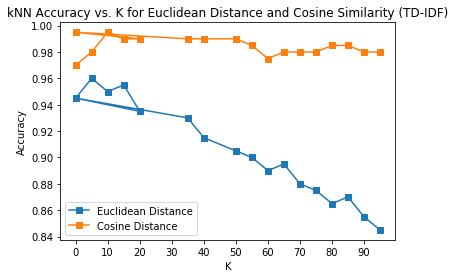

In [43]:
plt.clf()
plt.cla()
plt.close()
import matplotlib.pyplot as plt
%matplotlib inline

x = [Euclid.index(i)*5 for i in Euclid]
print(Cosine)

plt.plot(x, Euclid, label='Euclidean Distance', marker="s") 
plt.plot(x, Cosine, label='Cosine Distance',marker="s") 

plt.xlabel('K')
plt.xticks(range(0,100,10))

plt.ylabel('Accuracy') 
plt.title('kNN Accuracy vs. K for Euclidean Distance and Cosine Similarity (TD-IDF)')
plt.legend(loc = 'best') 
plt.show()